# Some basic image processing

We continue in our effort to convince you that matrices are important and come from everywhere.

This time we take the point of view:  MATRICES  =  IMAGES

This means that things you know about matrices can be used to understand images. We don't want to make things too complicated, so we will stick to using matrix algebra for now.

Note: Everyone has to use the same image that we provide in the .zip file. 

### You should not include any additional libraries for this assignment, except the ones we give in the code below.


## Problem 1. 

We start by loading the image into a numpy array and look at the shape of the array we get.

We have given you code to do this below.

### a) 

We have a 3d array this time, due to the three RGB channels.

The first thing we want to do is to create a one-channel 2d greyscale image. The colours red/green and blue have different luminosity, so use the formula

grey = red * 0.2126 + green * 0.7152 + blue*0.0722

to calculate the greyscale value. 

Do the calculation and put the result in a 2d array.

### b)

We then want to scale the entries in the image so that they are between 0..1 instead of 0..255. Do that now on the answer from a).

#### Store the result in a variable called image. When you continue answering questions, do so by taking a copy of image. You always want to have the original image kept in a separate so that you can start over.

### c)

Have a look at the greyscale image from b). Use

plt.imshow(image, cmap="gray")

where image is your answer from b).



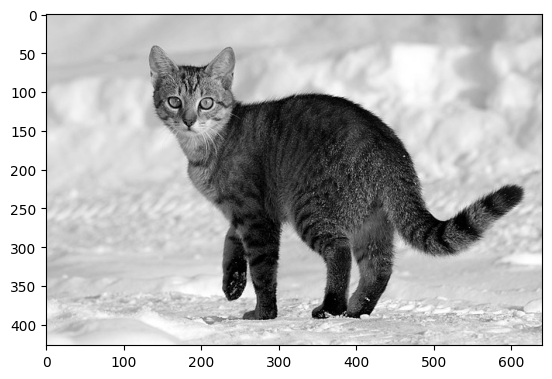

<class 'numpy.ndarray'>
(427, 640)


In [2]:
import matplotlib.pyplot as plt 
import numpy as np

f = np.array(plt.imread("cat.jpg"))
f2d = np.dot(f[:,:], np.array([0.2226, 0.7152, 0.0722]))

imageGray = f2d/255

plt.imshow(imageGray, cmap='gray')
plt.show()
print(type(imageGray))
print(imageGray.shape)



## Working with the image as a vector

You will need to revert to the original image from Problem 1 b) for each question, so make a copy of the image and store it in a separate variable. 

## Problem 2

### a) 

Starting with the original grayscale image from Problem 1 b)

Create a new image where all greyscale values less than 0.499 are set to 0.0. and all values greater than 0.501 are set to 1.0.

Values between 0.499 and 0.501 should be set to 0.5.

Show the result.

### b)

Starting with the original grayscale image from Problem 1 b):

We want to make bright colours brighter (more towards 1.0) and dark colours darker (more towards 0.0), but keep values at 0.5 unchanged.

We can do this with smoothstep (of degree 3, that is: t*t*(3-2*t) ). So apply smoothstep on the image and display it.

Apply smoothstep again 10 more times in a loop. Show the final image.

### c)

The distance between two matrices, e.g. 

$\begin{pmatrix}a & b \\ c & d \end{pmatrix}$ and $\begin{pmatrix}x & y \\ z & w\end{pmatrix}$ is

then $\sqrt{(a-x)^2+(b-y)^2+(c-z)^2+(d-w)^2}$

Compute the distance between the answer from a) and the answer from b)



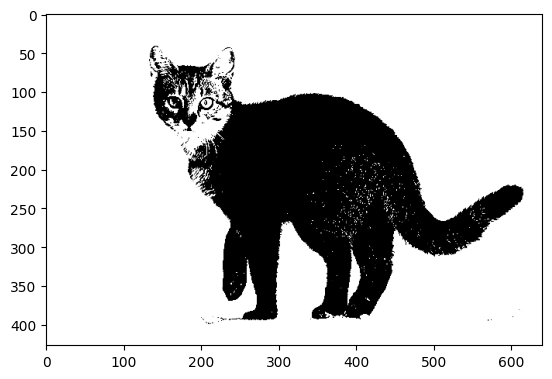

In [3]:
# a
image = np.zeros_like(imageGray)+0.5
image[imageGray>0.501] = 1
image[imageGray<0.499] = 0

# b
image = imageGray.copy()
for i in range(1, 10):
    image = image**2*(3-2*image)

plt.imshow(image, cmap='gray')
plt.show()

## Convolution

Read this: https://en.wikipedia.org/wiki/Kernel_(image_processing)

We think you understand enough math to be able to read and understand most of this wikipedia page on your own. It is ok if you don't understand everything, and if you get really stuck, then just ask one of us for help.

You have learned a new kind of product on matrices now, this one is called the convolution product. 

Other products you might have seen are the matrix product, the Hadamarad product, the inner and outer product, the cross product and Kronecker (or tensor) product.

There are a lot of products.

## Problem 3

### a) 

We will apply kernels to the image we provided.

The first is a smoothing kernel. Each pixel is put equal to the average value of itself and its neighboors. The kernel is 

$\frac{1}{9}\begin{pmatrix}1 & 1 & 1 \\ 1 & 1 & 1 \\ 1& 1 & 1\end{pmatrix}$

Run this kernel on the image from Problem 1b). 

We don't want you to solve the problem using loops. Do this in one (long) line of numpy code.

Note! We can only apply the kernel in the interior of the image, since pixels on the border will have missing neighbours.


### b)

Run the kernel from a) many times. Observe what happens when the number of runs increases. Explain what you see and explain why (answer in markdown)

### c)

Implement a function

def runKernel3by3(image, kernel):

where image is an image, kernel is a 3x3 kernel, and the function returns the result of applying the kernel on the image.
The function should accept any 3x3 kernel.


### d)

We want you to test your function from c) by applying the kernel from a) using the function and then computing the distance to the result from a).

You should get a distance of 0 if you have done everything correctly.


### e)

You will find several kernels on the wikipedia page we linked to above. 

Try your function using two different 3x3 kernels of your choice. 

Each kernel should be applied to the original image from Problem 1 b)

Show the results.

Give the names of these kernels and explain what they are used for (answer as a comment in your code)


### f) 

Improve on your runKernel3by3 function and implement

def runKernel(image, kernel):

This time the kernel can be a square matrix of any (odd) size.  Try to use numpy as much as possible, and try to avoid unecessary loops.

Test your result by computing the distance between the output of runKernel and runKernel3by3.

Apply the 5x5 kernel "Unsharp masking" from the linked wikipedia page on the original image (Problem 1b) using your new function runKernel.

Show the image.


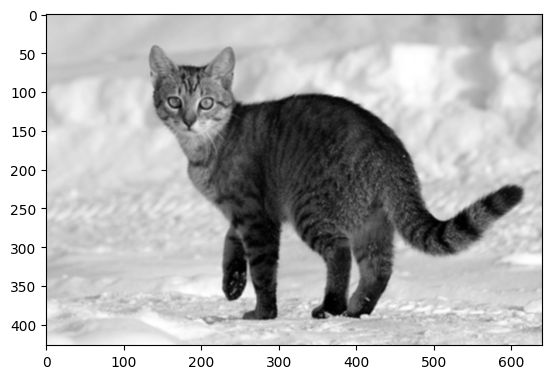

In [39]:
# Answer to a)
kernel = np.ones((3,3))/9
image = imageGray.copy()
n, m = image.shape
image[1:n-1, 1:m-1] = image[0:n-2, 0:m-2]*kernel[0, 0]+image[1:n-1, 0:m-2]*kernel[1, 0]+image[2:n, 0:m-2]*kernel[2, 0]+image[0:n-2, 1:m-1]*kernel[0, 1]+image[1:n-1, 1:m-1]*kernel[1, 1]+image[2:n, 1:m-1]*kernel[2, 1]+image[0:n-2, 2:m]*kernel[0, 2]+image[1:n-1, 2:m]*kernel[1, 2]+image[2:n, 2:m]*kernel[2, 2]

plt.imshow(image, cmap='gray')
plt.show()

Answer to b)
The picture gets blurier and blurier. This is because the the pixels are calculated by taking the sum of the surronding pixels and multiplying with a weight. At some point the blur seems to do less but that is because the surounding pixels are starting to get really close to each other.

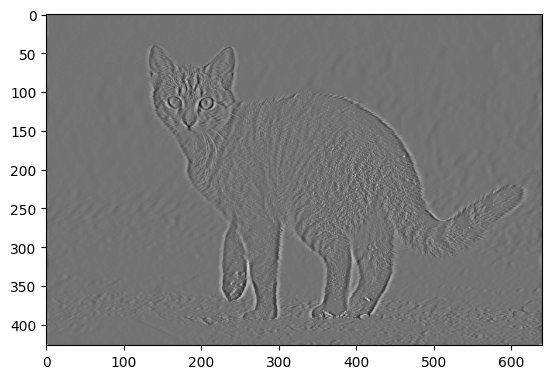

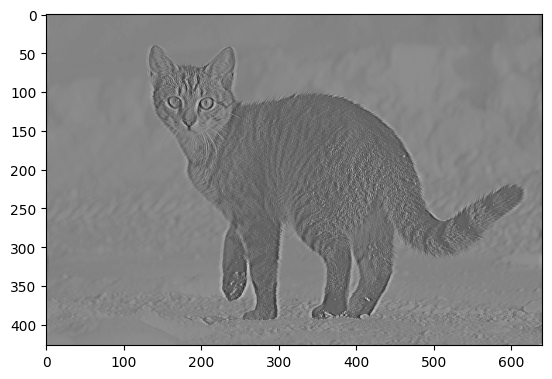

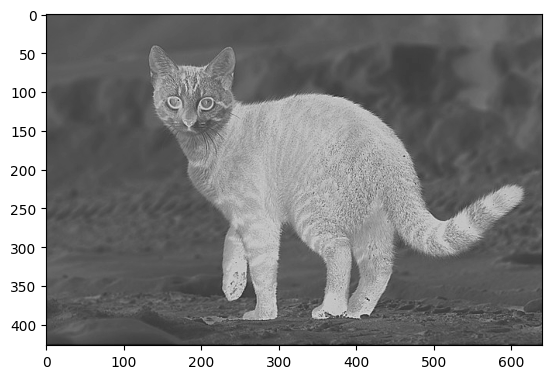

In [10]:
# Answer to c) - f)
def runKernel3by3(image, kernel):
    return np.convolve(image.flatten(), np.insert(kernel.flatten(), (3, 6), [0,0]), mode='same').reshape(image.shape)

# Used for detecting edges, it does this by subtracting the surrounding pixels from the center pixel, if the center pixel is very different from the surrounding pixels, it will be a strong edge
edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
# Used for sharpening the image, it does almost the same as edge but it does not include the corners
sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

import scipy.signal as signal

# print(signal.convolve2d(imageGray, edge, mode='same') - runKernel3by3(imageGray, edge))


def runKernal(image, kernel):
    padding = image.shape[1]-kernel.shape[1]
    kernel = np.hstack((kernel, np.zeros((kernel.shape[0], image.shape[1]-kernel.shape[1])))).flatten()
    kernel = kernel[0:-padding]
    return np.convolve(image.flatten(), kernel.flatten(), mode='same').reshape(image.shape)

plt.imshow(runKernel3by3(imageGray, edge), cmap='gray')
plt.show()
plt.imshow(runKernel3by3(imageGray, sharp), cmap='gray')
plt.show()

# Unsharp mask
unsharp = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])/256
plt.imshow(runKernal(imageGray, unsharp), cmap='gray')
plt.show()

## Convolution using matrix products

We promised we would look at matrix products.

It is possible to do convolution using matrix products. 

Why would we want to: Well matrix products often have super optimised implementations, and well, it is very good practise in working with matrices and numpy.

Consider a 3x3 kernel.

$K=\begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{pmatrix}$ 

and the image is a $3\times 4$ matrix $D=\begin{pmatrix}a & b & c & d \\ e & f & g & h \\ i & j & k & l\end{pmatrix}$.

The convolution will be a matrix multiplication M @ v, where M is constructed from the kernel and v is constructed from the image.

First, v is a column vector created by stacking the rows of D on top of each other.

$v = \begin{pmatrix}a \\ b \\ c \\ d \\ e \\ f \\ g \\ h \\ i \\ j \\ k \\ l \end{pmatrix}$

We will now create nine 12x12 matrices Knm for n,m=0..2, one for each of the entries of K. 

For the first matrix K00 we will consider only how the entry $1$ at position (0,0) in K acts on the image. 
We have that $1 \cdot a$ is sent to the position of $f$, $1\cdot b$ is sent to the position of $g$.
This means that

K00[4,0] = 1
K00[4,1] = 1

and K00[i,j] = 0 otherwise.

For the matrix K12 we will consider how the entry $2$ in $K$ acts on the image. We will have

K01[4,1] = 2
K01[4,2] = 2

and K01[i,j] = 0 otherwise.

Similarly for the 7 other matrices Knm.

## Problem 3

Compute all the matrices Kmn.

The matrix M is the matrix obtained as the sum of all the matrices Kmn.

Compute the matrix M.

Compute the matrix product M @ v.

We recommend doing this by programming, using numpy and slicing, as this will be useful for the next question.



## Problem 4

This problem is a complicated problem to grade, so we will only grade if you have done everything we ask for, exactly the way we have asked for, and your test shows that you got the correct answer.

Lets go back to the original image of the cat from Problem 1b). 

The image is 427x640. So the vector v will have 273280 entries. The matrix M will be 273280 x 273280 which is huge.

The matrix M will have a lot of zeros and other kinds of structure to make computation fast and memory consumption low. We will not cover this aspect of matrix computation in this assignment.

Instead, lets pick out a part of the image: slice and take out pixels at [100:125, 150:175] and continue working with this image. You should get an eye.

Choose "Gaussian Blur 3x3" from the wikipedia link for your 3x3 kernel.

Compute the vector v. It will have size 25*25 = 625.

Compute the 9 matrices Knm. Each matrix will have size 625 x 625.

Compute the matrix M which is the sum of all the matrices Knm

Compute the product M @ v to perform the convolution.

Reshape (np.reshape) v back to a 25x25 image.

Run a test to show that the computation is correct. The test should be done by running the convolution as you did in earlier problems, and then computing the distance between the results, which should be 0.



[0. 0. 6. 0.]
